# Unet Pipeline (Baseline)

We are using a simple approach where:
1. We load training and validation data in batches:
    * using `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` makes it easy and clean (see `loaders.py` )

    * extensive augmentations from the `imgaug` package are be applied to images (see `augmentations.py` )

2. We train a simple unet architecture for the multiclass problem (right now just 2 class but we want to prepared :) ). 
    * The implementation can be explored in `steps.pytorch.architectures.unet`
    * The parameters are specified in `neptune.yaml`

3. Basic postprocessing is applied to the output:
    * images are resized to `300x300` 
    * instances of the same class are labeled 
    
The entire pipeline is defined in the `pipelines.py`. You can import it and visualize it in the notebook by running:

neptune: Executing in Offline Mode.


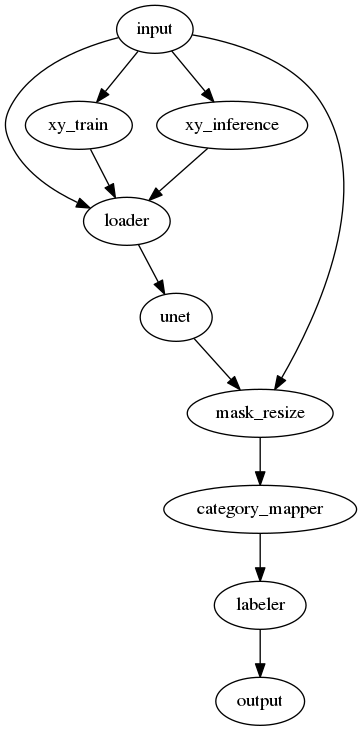

In [5]:
from pipelines import unet
import pipeline_config as cfg

unet(cfg.SOLUTION_CONFIG, train_mode=True)

One can easily extend this pipeline by adding new steps to it.
You just need to implement your Transformer

```python
from steps.base import BaseTransformer

class MyTransformer(BaseTransformer):
    def __init__(self, example_attribute_1, example_attribute_2):
        self.example_attribute_1 = example_attribute_1
        self.example_attribute_2 = example_attribute_2
        
    def fit(self, argument_1, argument_2, **kwargs):
        """ Do trainable logic here
        """
        return self
        
    def transform(self, argument_1, argument_2, **kwargs): 
        """ Apply transform based on trainable logic (or not) here
        """
        return {'output_name_1': output_1,
                'output_name_2': output_2
               }
    def save(self, filepath):
        """ Saving logic goes here
        """
        pass
    
    def load(self, filepath):
        """ Loading logic goes here
        """
        return self
           
```

Check the examples of using steps here: https://github.com/minerva-ml /steps/tree/dev/examples 

or in other `open-solution-...` projects on https://github.com/minerva-ml .